In [63]:
import time
import torch
import sbi.utils as utils
from sbi.inference.base import infer
from sbi.analysis.plot import pairplot
import numpy as np
import pyross
from matplotlib import pyplot as plt
from memilio.epidata import getCaseData, getPopulationData
from memiliflow.data.case_data import CaseData
from datetime import date
import pandas as pd






In [59]:
def to_pyross_oseir_array(
        self, total_population, time_exposed, time_infected, key="cases_all_germany_ma7"
    ) -> np.array:
    """This function computes compartments based on case data. It will produce some nans at the beginning and end
    of array because some compartments can not be estimated"""
    dataframe = self.to_oseir_compartments(time_exposed, time_infected, key=key)
    print(dataframe.columns)
    dataframe[self.Label.CONFIRMED.COMPARTMENT_SUSCEPTIBLE.value] = (
            total_population
            - dataframe[self.Label.COMPARTMENT_EXPOSED.value]
            - dataframe[self.Label.COMPARTMENT_INFECTED.value]
            - dataframe[self.Label.COMPARTMENT_RECOVERED.value]
        )
    dataframe = dataframe[
            [
                self.Label.COMPARTMENT_SUSCEPTIBLE.value,
                self.Label.COMPARTMENT_EXPOSED.value,
                self.Label.COMPARTMENT_INFECTED.value,
                self.Label.COMPARTMENT_RECOVERED.value,
            ]
        ]
    return dataframe.to_numpy()


In [60]:
data_pyross=to_pyross_oseir_array(casedata,total_population=1e6,time_exposed=5,time_infected=10)
data_pyross.flatten().shape

Index(['Date', 'Compartment Exposed', 'Compartment Infected',
       'Compartment Recovered'],
      dtype='object')


(368,)

In [147]:
#  CaseData.download_to_filesystem(
#          data_dir='/home/bazarova1/',
#          moving_average=7,
#          start_date=date.fromisoformat('2020-03-01'),
#          end_date=date.fromisoformat('2020-05-31'),
#          file_format='json_timeasstring',
#      )
#casedata=CaseData({"cases": pd.DataFrame.from_dict(data=simulated_data)})
#casedata.to_oseir_compartments(time_exposed=5,time_infected=10)

data={"Date":"2020-03-01","Confirmed":1902.4285714286,"Deaths":43.0,"Recovered":1859.4285714286},{"Date":"2020-03-02","Confirmed":2206.5714285714,"Deaths":50.1428571429,"Recovered":2156.4285714286},{"Date":"2020-03-03","Confirmed":2575.8571428571,"Deaths":59.4285714286,"Recovered":2516.4285714286},{"Date":"2020-03-04","Confirmed":3034.7142857143,"Deaths":71.5714285714,"Recovered":2963.1428571429},{"Date":"2020-03-05","Confirmed":3619.0,"Deaths":86.2857142857,"Recovered":3532.7142857143},{"Date":"2020-03-06","Confirmed":4415.0,"Deaths":103.2857142857,"Recovered":4311.7142857143},{"Date":"2020-03-07","Confirmed":5491.0,"Deaths":123.7142857143,"Recovered":5367.2857142857},{"Date":"2020-03-08","Confirmed":6912.8571428571,"Deaths":149.5714285714,"Recovered":6763.2857142857},{"Date":"2020-03-09","Confirmed":8721.5714285714,"Deaths":182.7142857143,"Recovered":8538.8571428571},{"Date":"2020-03-10","Confirmed":10993.8571428571,"Deaths":224.4285714286,"Recovered":10769.4285714286},{"Date":"2020-03-11","Confirmed":13707.5714285714,"Deaths":271.7142857143,"Recovered":13435.8571428571},{"Date":"2020-03-12","Confirmed":16841.2857142857,"Deaths":329.7142857143,"Recovered":16511.5714285714},{"Date":"2020-03-13","Confirmed":20505.1428571429,"Deaths":403.5714285714,"Recovered":20101.5714285714},{"Date":"2020-03-14","Confirmed":24549.1428571429,"Deaths":490.7142857143,"Recovered":24058.4285714286},{"Date":"2020-03-15","Confirmed":28924.0,"Deaths":591.7142857143,"Recovered":28332.2857142857},{"Date":"2020-03-16","Confirmed":33503.2857142857,"Deaths":702.4285714286,"Recovered":32800.8571428571},{"Date":"2020-03-17","Confirmed":38265.8571428571,"Deaths":830.0,"Recovered":37435.8571428571},{"Date":"2020-03-18","Confirmed":43075.4285714286,"Deaths":969.4285714286,"Recovered":42106.0},{"Date":"2020-03-19","Confirmed":47794.4285714286,"Deaths":1113.4285714286,"Recovered":46681.0},{"Date":"2020-03-20","Confirmed":52439.8571428571,"Deaths":1274.5714285714,"Recovered":51165.2857142857},{"Date":"2020-03-21","Confirmed":56958.7142857143,"Deaths":1447.8571428571,"Recovered":55510.8571428571},{"Date":"2020-03-22","Confirmed":61394.1428571429,"Deaths":1637.2857142857,"Recovered":59756.8571428571},{"Date":"2020-03-23","Confirmed":65782.7142857143,"Deaths":1841.1428571429,"Recovered":63941.5714285714},{"Date":"2020-03-24","Confirmed":70062.2857142857,"Deaths":2053.7142857143,"Recovered":68008.5714285714},{"Date":"2020-03-25","Confirmed":74301.5714285714,"Deaths":2283.5714285714,"Recovered":72018.0},{"Date":"2020-03-26","Confirmed":78484.7142857143,"Deaths":2520.2857142857,"Recovered":75964.4285714286},{"Date":"2020-03-27","Confirmed":82580.5714285714,"Deaths":2765.2857142857,"Recovered":79815.2857142857},{"Date":"2020-03-28","Confirmed":86664.7142857143,"Deaths":3018.1428571429,"Recovered":83646.5714285714},{"Date":"2020-03-29","Confirmed":90732.2857142857,"Deaths":3278.5714285714,"Recovered":87453.7142857143},{"Date":"2020-03-30","Confirmed":94794.8571428571,"Deaths":3553.1428571429,"Recovered":91241.7142857143},{"Date":"2020-03-31","Confirmed":98846.7142857143,"Deaths":3839.8571428571,"Recovered":95006.8571428571},{"Date":"2020-04-01","Confirmed":102799.7142857143,"Deaths":4122.1428571429,"Recovered":98677.5714285714},{"Date":"2020-04-02","Confirmed":106698.2857142857,"Deaths":4408.0,"Recovered":102290.2857142857},{"Date":"2020-04-03","Confirmed":110474.4285714286,"Deaths":4691.4285714286,"Recovered":105783.0},{"Date":"2020-04-04","Confirmed":114176.8571428571,"Deaths":4974.0,"Recovered":109202.8571428571},{"Date":"2020-04-05","Confirmed":117736.4285714286,"Deaths":5251.4285714286,"Recovered":112485.0},{"Date":"2020-04-06","Confirmed":121161.0,"Deaths":5518.1428571429,"Recovered":115642.8571428571},{"Date":"2020-04-07","Confirmed":124328.4285714286,"Deaths":5764.4285714286,"Recovered":118564.0},{"Date":"2020-04-08","Confirmed":127361.8571428571,"Deaths":6001.2857142857,"Recovered":121360.5714285714},{"Date":"2020-04-09","Confirmed":130289.5714285714,"Deaths":6231.5714285714,"Recovered":124058.0},{"Date":"2020-04-10","Confirmed":132971.4285714286,"Deaths":6437.5714285714,"Recovered":126533.8571428571},{"Date":"2020-04-11","Confirmed":135455.4285714286,"Deaths":6628.2857142857,"Recovered":128827.1428571429},{"Date":"2020-04-12","Confirmed":137765.8571428571,"Deaths":6803.0,"Recovered":130962.8571428571},{"Date":"2020-04-13","Confirmed":139913.7142857143,"Deaths":6960.0,"Recovered":132953.7142857143},{"Date":"2020-04-14","Confirmed":142007.2857142857,"Deaths":7106.8571428571,"Recovered":134900.4285714286},{"Date":"2020-04-15","Confirmed":144005.5714285714,"Deaths":7244.0,"Recovered":136761.5714285714},{"Date":"2020-04-16","Confirmed":145917.4285714286,"Deaths":7373.4285714286,"Recovered":138544.0},{"Date":"2020-04-17","Confirmed":147805.8571428571,"Deaths":7502.1428571429,"Recovered":140303.7142857143},{"Date":"2020-04-18","Confirmed":149615.8571428571,"Deaths":7623.1428571429,"Recovered":141992.7142857143},{"Date":"2020-04-19","Confirmed":151349.8571428571,"Deaths":7734.2857142857,"Recovered":143615.5714285714},{"Date":"2020-04-20","Confirmed":153001.4285714286,"Deaths":7841.2857142857,"Recovered":145160.1428571429},{"Date":"2020-04-21","Confirmed":154548.2857142857,"Deaths":7939.5714285714,"Recovered":146608.7142857143},{"Date":"2020-04-22","Confirmed":156019.4285714286,"Deaths":8032.2857142857,"Recovered":147987.1428571429},{"Date":"2020-04-23","Confirmed":157418.1428571429,"Deaths":8115.5714285714,"Recovered":149302.5714285714},{"Date":"2020-04-24","Confirmed":158752.5714285714,"Deaths":8190.7142857143,"Recovered":150561.8571428571},{"Date":"2020-04-25","Confirmed":160025.1428571429,"Deaths":8260.7142857143,"Recovered":151764.4285714286},{"Date":"2020-04-26","Confirmed":161209.7142857143,"Deaths":8326.0,"Recovered":152883.7142857143},{"Date":"2020-04-27","Confirmed":162332.1428571429,"Deaths":8385.4285714286,"Recovered":153946.7142857143},{"Date":"2020-04-28","Confirmed":163370.7142857143,"Deaths":8440.4285714286,"Recovered":154930.2857142857},{"Date":"2020-04-29","Confirmed":164347.0,"Deaths":8490.1428571429,"Recovered":155856.8571428571},{"Date":"2020-04-30","Confirmed":165294.5714285714,"Deaths":8538.1428571429,"Recovered":156756.4285714286},{"Date":"2020-05-01","Confirmed":166193.4285714286,"Deaths":8582.8571428571,"Recovered":157610.5714285714},{"Date":"2020-05-02","Confirmed":167065.8571428571,"Deaths":8623.7142857143,"Recovered":158442.1428571429},{"Date":"2020-05-03","Confirmed":167913.1428571429,"Deaths":8659.5714285714,"Recovered":159253.5714285714},{"Date":"2020-05-04","Confirmed":168719.1428571429,"Deaths":8692.1428571429,"Recovered":160027.0},{"Date":"2020-05-05","Confirmed":169516.0,"Deaths":8724.2857142857,"Recovered":160791.7142857143},{"Date":"2020-05-06","Confirmed":170300.7142857143,"Deaths":8754.0,"Recovered":161546.7142857143},{"Date":"2020-05-07","Confirmed":171064.4285714286,"Deaths":8783.8571428571,"Recovered":162280.5714285714},{"Date":"2020-05-08","Confirmed":171806.7142857143,"Deaths":8810.7142857143,"Recovered":162996.0},{"Date":"2020-05-09","Confirmed":172512.5714285714,"Deaths":8834.5714285714,"Recovered":163678.0},{"Date":"2020-05-10","Confirmed":173188.8571428571,"Deaths":8858.4285714286,"Recovered":164330.4285714286},{"Date":"2020-05-11","Confirmed":173833.8571428571,"Deaths":8879.4285714286,"Recovered":164954.4285714286},{"Date":"2020-05-12","Confirmed":174469.2857142857,"Deaths":8899.8571428571,"Recovered":165569.4285714286},{"Date":"2020-05-13","Confirmed":175090.7142857143,"Deaths":8922.5714285714,"Recovered":166168.1428571429},{"Date":"2020-05-14","Confirmed":175704.7142857143,"Deaths":8943.5714285714,"Recovered":166761.1428571429},{"Date":"2020-05-15","Confirmed":176310.5714285714,"Deaths":8963.1428571429,"Recovered":167347.4285714286},{"Date":"2020-05-16","Confirmed":176900.8571428571,"Deaths":8982.0,"Recovered":167918.8571428571},{"Date":"2020-05-17","Confirmed":177491.0,"Deaths":9001.4285714286,"Recovered":168489.5714285714},{"Date":"2020-05-18","Confirmed":178049.5714285714,"Deaths":9019.4285714286,"Recovered":169030.1428571429},{"Date":"2020-05-19","Confirmed":178565.1428571429,"Deaths":9034.8571428571,"Recovered":169530.2857142857},{"Date":"2020-05-20","Confirmed":179058.5714285714,"Deaths":9048.4285714286,"Recovered":170010.1428571429},{"Date":"2020-05-21","Confirmed":179537.5714285714,"Deaths":9061.0,"Recovered":170476.5714285714},{"Date":"2020-05-22","Confirmed":179992.2857142857,"Deaths":9073.1428571429,"Recovered":170919.1428571429},{"Date":"2020-05-23","Confirmed":180451.4285714286,"Deaths":9085.5714285714,"Recovered":171365.8571428571},{"Date":"2020-05-24","Confirmed":180885.4285714286,"Deaths":9095.5714285714,"Recovered":171789.8571428571},{"Date":"2020-05-25","Confirmed":181323.5714285714,"Deaths":9106.0,"Recovered":172217.5714285714},{"Date":"2020-05-26","Confirmed":181753.8571428571,"Deaths":9115.2857142857,"Recovered":172638.5714285714},{"Date":"2020-05-27","Confirmed":182183.4285714286,"Deaths":9123.7142857143,"Recovered":173059.7142857143},{"Date":"2020-05-28","Confirmed":182602.0,"Deaths":9132.2857142857,"Recovered":173469.7142857143},{"Date":"2020-05-29","Confirmed":182989.7142857143,"Deaths":9140.4285714286,"Recovered":173849.2857142857},{"Date":"2020-05-30","Confirmed":183346.1428571429,"Deaths":9147.4285714286,"Recovered":174198.7142857143},{"Date":"2020-05-31","Confirmed":183693.1428571429,"Deaths":9153.2857142857,"Recovered":174539.8571428571}
# data={"Date":"2020-03-01","Confirmed":1902.4285714286,"Deaths":43.0,"Recovered":1859.4285714286},{"Date":"2020-03-02","Confirmed":2206.5714285714,"Deaths":50.1428571429,"Recovered":2156.4285714286},{"Date":"2020-03-03","Confirmed":2575.8571428571,"Deaths":59.4285714286,"Recovered":2516.4285714286},{"Date":"2020-03-04","Confirmed":3034.7142857143,"Deaths":71.5714285714,"Recovered":2963.1428571429},{"Date":"2020-03-05","Confirmed":3619.0,"Deaths":86.2857142857,"Recovered":3532.7142857143},{"Date":"2020-03-06","Confirmed":4415.0,"Deaths":103.2857142857,"Recovered":4311.7142857143},{"Date":"2020-03-07","Confirmed":5491.0,"Deaths":123.7142857143,"Recovered":5367.2857142857},{"Date":"2020-03-08","Confirmed":6912.8571428571,"Deaths":149.5714285714,"Recovered":6763.2857142857},{"Date":"2020-03-09","Confirmed":8721.5714285714,"Deaths":182.7142857143,"Recovered":8538.8571428571},{"Date":"2020-03-10","Confirmed":10993.8571428571,"Deaths":224.4285714286,"Recovered":10769.4285714286},{"Date":"2020-03-11","Confirmed":13707.5714285714,"Deaths":271.7142857143,"Recovered":13435.8571428571},{"Date":"2020-03-12","Confirmed":16841.2857142857,"Deaths":329.7142857143,"Recovered":16511.5714285714},{"Date":"2020-03-13","Confirmed":20505.1428571429,"Deaths":403.5714285714,"Recovered":20101.5714285714},{"Date":"2020-03-14","Confirmed":24549.1428571429,"Deaths":490.7142857143,"Recovered":24058.4285714286},{"Date":"2020-03-15","Confirmed":28924.0,"Deaths":591.7142857143,"Recovered":28332.2857142857},{"Date":"2020-03-16","Confirmed":33503.2857142857,"Deaths":702.4285714286,"Recovered":32800.8571428571},{"Date":"2020-03-17","Confirmed":38265.8571428571,"Deaths":830.0,"Recovered":37435.8571428571},{"Date":"2020-03-18","Confirmed":43075.4285714286,"Deaths":969.4285714286,"Recovered":42106.0},{"Date":"2020-03-19","Confirmed":47794.4285714286,"Deaths":1113.4285714286,"Recovered":46681.0},{"Date":"2020-03-20","Confirmed":52439.8571428571,"Deaths":1274.5714285714,"Recovered":51165.2857142857},{"Date":"2020-03-21","Confirmed":56958.7142857143,"Deaths":1447.8571428571,"Recovered":55510.8571428571},{"Date":"2020-03-22","Confirmed":61394.1428571429,"Deaths":1637.2857142857,"Recovered":59756.8571428571},{"Date":"2020-03-23","Confirmed":65782.7142857143,"Deaths":1841.1428571429,"Recovered":63941.5714285714},{"Date":"2020-03-24","Confirmed":70062.2857142857,"Deaths":2053.7142857143,"Recovered":68008.5714285714},{"Date":"2020-03-25","Confirmed":74301.5714285714,"Deaths":2283.5714285714,"Recovered":72018.0},{"Date":"2020-03-26","Confirmed":78484.7142857143,"Deaths":2520.2857142857,"Recovered":75964.4285714286},{"Date":"2020-03-27","Confirmed":82580.5714285714,"Deaths":2765.2857142857,"Recovered":79815.2857142857},{"Date":"2020-03-28","Confirmed":86664.7142857143,"Deaths":3018.1428571429,"Recovered":83646.5714285714},{"Date":"2020-03-29","Confirmed":90732.2857142857,"Deaths":3278.5714285714,"Recovered":87453.7142857143},{"Date":"2020-03-30","Confirmed":94794.8571428571,"Deaths":3553.1428571429,"Recovered":91241.7142857143},{"Date":"2020-03-31","Confirmed":98846.7142857143,"Deaths":3839.8571428571,"Recovered":95006.8571428571}
pd.DataFrame.from_dict(data)
casedata=CaseData({"cases_all_germany_ma7": pd.DataFrame.from_dict(data=data)})
casedata.data["cases_all_germany_ma7"].iloc[:30]

#casedata.to_oseir_compartments(time_exposed=5,time_infected=10)

Date     Confirmed       Deaths     Recovered
0   2020-03-01   1902.428571    43.000000   1859.428571
1   2020-03-02   2206.571429    50.142857   2156.428571
2   2020-03-03   2575.857143    59.428571   2516.428571
3   2020-03-04   3034.714286    71.571429   2963.142857
4   2020-03-05   3619.000000    86.285714   3532.714286
5   2020-03-06   4415.000000   103.285714   4311.714286
6   2020-03-07   5491.000000   123.714286   5367.285714
7   2020-03-08   6912.857143   149.571429   6763.285714
8   2020-03-09   8721.571429   182.714286   8538.857143
9   2020-03-10  10993.857143   224.428571  10769.428571
10  2020-03-11  13707.571429   271.714286  13435.857143
11  2020-03-12  16841.285714   329.714286  16511.571429
12  2020-03-13  20505.142857   403.571429  20101.571429
13  2020-03-14  24549.142857   490.714286  24058.428571
14  2020-03-15  28924.000000   591.714286  28332.285714
15  2020-03-16  33503.285714   702.428571  32800.857143
16  2020-03-17  38265.857143   830.000000  37435.857143
17  2020-03-18  43075.428571   969.428571  42106.000000
18  2020-03-19  47794.428571  1113.428571  46681.000000
19  2020-03-20  52439.857143  1274.571429  51165.285714
20  2020-03-21  56958.714286  1447.857143  55510.857143
21  2020-03-22  61394.142857  1637.285714  59756.857143
22  2020-03-23  65782.714286  1841.142857  63941.571429
23  2020-03-24  70062.285714  2053.714286  68008.571429
24  2020-03-25  74301.571429  2283.571429  72018.000000
25  2020-03-26  78484.714286  2520.285714  75964.428571
26  2020-03-27  82580.571429  2765.285714  79815.285714
27  2020-03-28  86664.714286  3018.142857  83646.571429
28  2020-03-29  90732.285714  3278.571429  87453.714286
29  2020-03-30  94794.857143  3553.142857  91241.714286

In [ ]:
def to_pyross_oseir_array(
        total_population, time_exposed, time_infected, key="cases_all_germany_ma7"
    ) -> np.array:
        """This function computes compartments based on case data. It will produce some nans at the beginning and end
        of array because some compartments can not be estimated"""
        
        print(time_exposed, time_infected)
        dataframe = CaseData.to_oseir_compartments(time_exposed, time_infected, key=key)
        print(dataframe.columns)
        dataframe[CaseData.Label.CONFIRMED.COMPARTMENT_SUSCEPTIBLE.value] = (
            total_population
            - dataframe[CaseData.Label.COMPARTMENT_EXPOSED.value]
            - dataframe[CaseData.Label.COMPARTMENT_INFECTED.value]
            - dataframe[CaseData.Label.COMPARTMENT_RECOVERED.value]
        )
        dataframe = dataframe[
            [
                CaseData.Label.COMPARTMENT_SUSCEPTIBLE.value,
                CaseData.Label.COMPARTMENT_EXPOSED.value,
                CaseData.Label.COMPARTMENT_INFECTED.value,
                CaseData.Label.COMPARTMENT_RECOVERED.value,
            ]
        ]
        return dataframe.to_numpy()

to_pyross_oseir_array(total_population=1e6,time_exposed=5,time_infected=10)

In [175]:
def simulate_stochastic_trajectory():
    M = 1  # the population has one age groups
    N = 1e6  # and this is the total population
    Ni = N * np.ones(M)

    # parameters for generating synthetic trajectory
    beta = 0.95  # infection rate
    gE = 1.0 / 5.2  # recovery rate of asymptomatic infectives
    gI = 1.0 / 10  # recovery rate of asymptomatic infectives

    # set up initial condition
    E0 = 100
    I0 = 1900
    R0 = 10
    S0 = N - (E0 + I0 + R0)
    x0 = {"S": [S0], "E": [E0], "I": [I0], "R": [R0]}

    Tf = 100  # reduce time span if sim is too slow
    Nf = Tf + 1

    # set the contact structure
    C = np.array([[1.0]])

    # [[18., 9.],
    #           [3., 12.]])
    # C_ij = number of people group from group i that an individual from group j meets per day
    def contactMatrix(t):
        return C

    parameters = {"beta": beta, "gE": gE, "gI": gI}
    true_parameters = {"beta": beta, "gE": gE, "gI": gI}

    model_spec = {
        "classes": ["S", "E", "I", "R"],
        "S": {
            "infection": [["I", "S", "-beta"]],
        },
        "E": {"linear": [["E", "-gE"]], "infection": [["I", "S", "beta"]]},
        "I": {
            "linear": [
                ["E", "gE"],
                ["I", "-gI"],
            ],
        },
        "R": {
            "linear": [["I", "gI"]],
        },
    }

    # use pyross stochastic to generate traj and save
    sto_model = pyross.stochastic.Model(model_spec, true_parameters, M, Ni)
    data = sto_model.simulate(x0, contactMatrix, Tf, Nf, method="tau-leaping")
    data_array = data["X"]
    np.save("SIR_sto_traj.npy", data_array)

    fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor="w", edgecolor="k")
    plt.rcParams.update({"font.size": 22})
    t = data["t"]

    plt.fill_between(t, 0, np.sum(data_array[:, :M], axis=1), alpha=0.3)
    plt.plot(t, np.sum(data_array[:, :M], axis=1), "-", label="S", lw=2)

    plt.fill_between(t, 0, np.sum(data_array[:, M : 2 * M], axis=1), alpha=0.3)
    plt.plot(t, np.sum(data_array[:, M : 2 * M], axis=1), "-", label="E", lw=2)

    plt.fill_between(t, 0, np.sum(data_array[:, 2 * M : 3 * M], axis=1), alpha=0.3)
    plt.plot(t, np.sum(data_array[:, 2 * M : 3 * M], axis=1), "-", label="I", lw=2)

    plt.fill_between(t, 0, np.sum(data_array[:, 3 * M : 4 * M], axis=1), alpha=0.3)
    plt.plot(t, np.sum(data_array[:, 3 * M : 4 * M], axis=1), "-", label="R", lw=2)

    plt.legend(fontsize=26)
    plt.grid()
    plt.xlabel(r"time")
    plt.autoscale(enable=True, axis="x", tight=True)
    plt.show()

    return data_array, M, Ni, true_parameters


def simulator2(parameters):
    M = 1  # the population has one age groups
    N = 1e6  # and this is the total population
    Ni = N * np.ones(M)

    # parameters for generating synthetic trajectory
    #print(parameters[0]," parameters")
    beta = np.array(parameters[0]) #0.95  # infection rate
    gE = np.array(parameters[1]) #1.0 / 5.2  # recovery rate of asymptomatic infectives
    gI = np.array(parameters[2]) #1.0 / 6  # recovery rate of symptomatic infectives
    #print(beta," beta")

    # set up initial condition
    E0 = parameters[3]
    I0 = 1900
    R0 = parameters[4]
    S0 = N - (E0 + I0 + R0)
    x0 = {"S": [S0], "E": [E0], "I": [I0], "R": [R0]}

    Tf = 40  # reduce time span if sim is too slow
    Nf = Tf + 1

    # set the contact structure
    C = np.array([[1.0]])

    # [[18., 9.],
    #           [3., 12.]])
    # C_ij = number of people group from group i that an individual from group j meets per day
    def contactMatrix(t):
        return C

    parameters = {"beta": beta, "gE": gE, "gI": gI}
    true_parameters = {"beta": beta, "gE": gE, "gI": gI}

    model_spec = {
        "classes": ["S", "E", "I", "R"],
        "S": {
            "infection": [["I", "S", "-beta"]],
        },
        "E": {"linear": [["E", "-gE"]], "infection": [["I", "S", "beta"]]},
        "I": {
            "linear": [
                ["E", "gE"],
                ["I", "-gI"],
            ],
        },
        "R": {
            "linear": [["I", "gI"]],
        },
    }

    # use pyross stochastic to generate traj and save
    #print(beta.shape," len beta")
    sto_model = pyross.stochastic.Model(model_spec, true_parameters, M, Ni)
    data = sto_model.simulate(x0, contactMatrix, Tf, Nf, method="tau-leaping")
    print(data)
    data_array = data["X"]
    #print(type(data_array))
    #print(data_array," shape data array")
    #data_array=data_array.flatten()
    data_array=np.cumsum(data_array[:,2])
    print(data_array)

    return data

prior = utils.BoxUniform(
    low=torch.tensor([0.0, 0.01,0.01,1900,1]),
    high=torch.tensor([1.99, 2.0, 2.0,6000,1900])
)


def run_sbi(data_array, M, Ni, true_parameters, Tf_inference=20):
    # load the data and rescale to intensive variables
    Tf_inference = 30  # truncate to only getting the first few datapoints
    Nf_inference = Tf_inference + 1
    observed_data = (data_array[:Nf_inference]).astype("float")

    inference_parameters = {"beta": 100, "gE": 100, "gI": 100}

    model_spec = {
        "classes": ["S", "E", "I", "R"],
        "S": {
            "infection": [["I", "S", "-beta"]],
        },
        "E": {"linear": [["E", "-gE"]], "infection": [["I", "S", "beta"]]},
        "I": {
            "linear": [
                ["E", "gE"],
                ["I", "-gI"],
            ],
        },
        "R": {
            "linear": [["I", "gI"]],
        },
    }

    # set the contact structure
    C = np.array([[1.0]])

    estimator = pyross.inference.Model(model_spec, inference_parameters, 1, Ni)

    # [[18., 9.],
    #           [3., 12.]])
    # C_ij = number of people group from group i that an individual from group j meets per day
    # TODO: check how contact matrix should be set in simulator
    def contactMatrix(t):
        return C

    print(observed_data[0].shape," observed_data")

    def simulator(parameters: np.array):
        # compute -log_p for the initial guess
        print("got here!")
        guessed_parameters = {
            "beta": parameters[0],
            "gE": parameters[1],
            "gI": parameters[2],
        }
        estimator.set_det_model(guessed_parameters)
        starting_time = 0
        print("got here!")
        print(observed_data[0]," observed_data")
        return estimator.integrate(observed_data[0], starting_time, Tf, Nf)


    # Define the prior (log normal prior around guess of parameter with defined std. deviation)
    beta_g = 0.95
    beta_std = 0.1
    gE_g = 1.0 / 5.2
    gE_std = 0.1
    gI_g = 1.0 / 6.0
    gI_std = 0.1


    prior_sbi=utils.BoxUniform(low=torch.tensor([-0.1,-0.1,-0.1]),high=torch.tensor([0.1,0.1,0.1]))

    num_sim=10

    method='SNRE'

    posterior=infer(simulator,
        prior_sbi,
    # See glossary for explanation of methods.
    #    SNRE newer than SNLE newer than SNPE.
        method=method,
        num_workers=-1,
        num_simulations=num_sim)

    print("success!")

In [164]:
num_sim = 1000
method = 'SNRE' #SNPE or SNLE or SNRE
posterior = infer(
    simulator2,
    prior,
    # See glossary for explanation of methods.
    #    SNRE newer than SNLE newer than SNPE.
    method=method,
    num_workers=-1,
    num_simulations=num_sim)

#data_array, M, Ni, true_parameters=simulate_stochastic_trajectory()

Running 1000 simulations in 1000 batches.: 100%|██████████| 1000/1000 [01:05<00:00, 15.22it/s]


 Neural network successfully converged after 111 epochs.

{'X': array([[996000,   2000,   1900,    100],
       [995440,   2020,   1886,    654],
       [994857,   2000,   1942,   1201],
       [994292,   2028,   1880,   1800],
       [993755,   1976,   1940,   2329],
       [993209,   1898,   1971,   2922],
       [992634,   1901,   1940,   3525],
       [992021,   1945,   1867,   4167],
       [991433,   2000,   1867,   4700],
       [990829,   1998,   1888,   5285],
       [990294,   2025,   1897,   5784],
       [989717,   2024,   1909,   6350],
       [989134,   1992,   1985,   6889],
       [988503,   1948,   2035,   7514],
       [987905,   1985,   2021,   8089],
       [987291,   2027,   1972,   8710],
       [986737,   2009,   2000,   9254],
       [986162,   1982,   1995,   9861],
       [985556,   1998,   1970,  10476],
       [985076,   1992,   1953,  10979],
       [984401,   2011,   1991,  11597],
       [983870,   2026,   1980,  12124],
       [983322,   2013,   2004,  12661],
       [982789,   1953,   2032,  13226],
       [98

TypeError: unhashable type: 'dict'

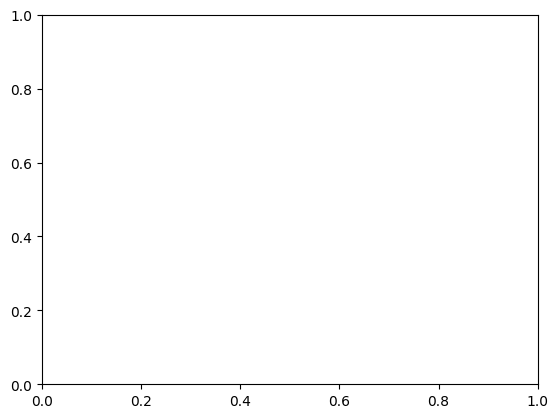

In [176]:
observation=simulator2(np.array([0.3,0.29,0.29,2000,100]))
print(len(np.asarray(casedata.data['cases_all_germany_ma7'].Confirmed)[13:90]))
#print(observation.shape)
#observation1=data_pyross[10:87].flatten()
#print(observation1.shape)
#plt.plot(observation[0::4])

#plt.plot(observation1[0::4])

#plt.plot(observation)
#plt.plot(casedata.data['cases_all_germany_ma7'].Confirmed[:40])

In [178]:
observation.keys()

dict_keys(['X', 't', 'Ni', 'M', 'beta', 'gE', 'gI'])

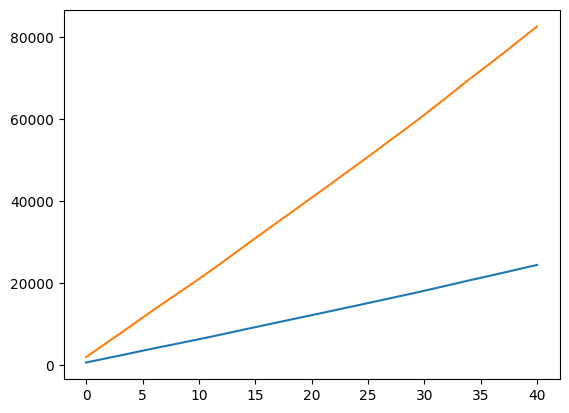

In [187]:
plt.plot(np.cumsum(observation["beta"]*observation["X"][:,0]*observation["X"][:,2]/observation["Ni"]))
plt.plot(np.cumsum(observation["X"][:,2]))

In [180]:
import seaborn as sns
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [171]:
#observation=np.asarray(casedata.data['cases_all_germany_ma7'].Confirmed)[0:41]
samples = posterior.sample((100,), x=observation)

Generating samples: 100%|██████████| 1100/1100 [02:16<00:00,  8.08it/s]


/home/bazarova1/.local/lib/python3.10/site-packages/sbi/inference/posteriors/mcmc_posterior.py:172: UserWarning: `.log_prob()` is deprecated for methods that can only evaluate the
            log-probability up to a normalizing constant. Use `.potential()` instead.
  warn(
/home/bazarova1/.local/lib/python3.10/site-packages/sbi/inference/posteriors/mcmc_posterior.py:176: UserWarning: The log-probability is unnormalized!
  warn("The log-probability is unnormalized!")


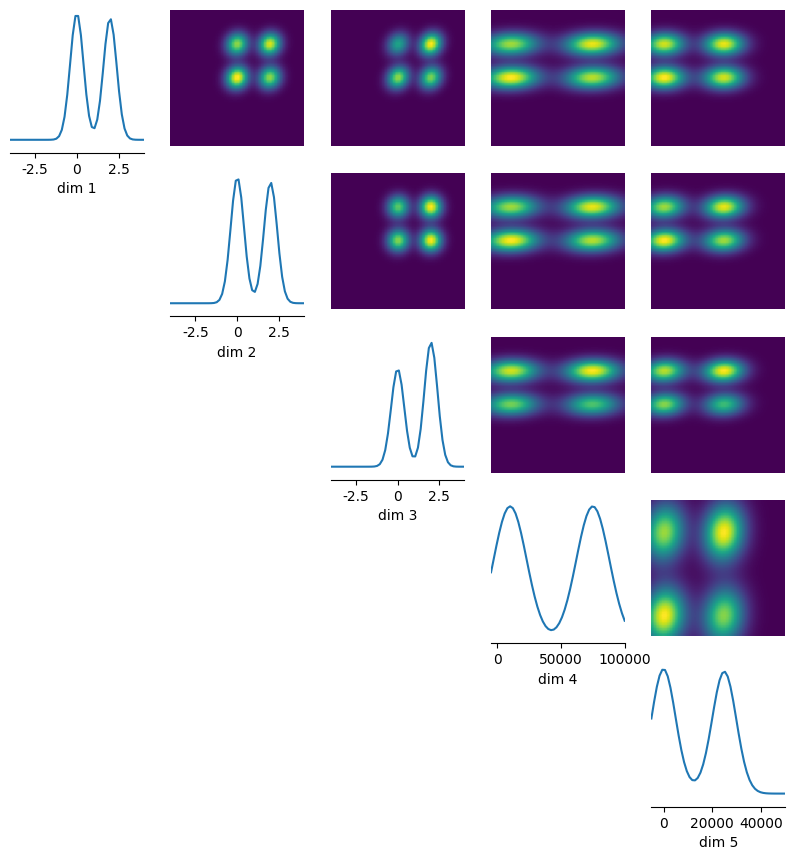

In [169]:
log_probability = posterior.log_prob(samples, x=observation)
out = pairplot(samples, limits=[[-4,4],[-4,4],[-4,4],[-5000,100000],[-5000,50000]], fig_size=(5,5), upper='kde', diag='kde')


In [ ]:
from scipy import stats
samples.shape
torch.mean(samples[:,0])
observation.shape


(404,)

In [ ]:
from typing import Optional

from dataclasses import dataclass

def get_dW(T: int, random_state: Optional[int] = None) -> np.ndarray:
    """
    Sample T times from a normal distribution,
    to simulate discrete increments (dW) of a Brownian Motion.
    Optional random_state to reproduce results.
    """
    np.random.seed(random_state)
    return np.random.normal(0.0, 1.0, T)

@dataclass
class OUParams:
    alpha: float  # mean reversion parameter
    gamma: float  # asymptotic mean
    beta: float  # Brownian motion scale (standard deviation)


def get_OU_process(
    T: int,
    OU_params: OUParams,
    X_0: Optional[float] = None,
    random_state: Optional[int] = None,
) -> np.ndarray:
    """
    - T is the sample size.
    - Ou_params is an instance of OUParams dataclass.
    - X_0 the initial value for the process, if None, then X_0 is taken
        to be gamma (the asymptotic mean).
    Returns a 1D array.
    """
    t = np.arange(T, dtype=np.float64) # float to avoid np.exp overflow
    exp_alpha_t = np.exp(-OU_params.alpha * t)
    dW = get_dW(T, random_state)
    integral_W = _get_integal_W(t, dW, OU_params)
    _X_0 = _select_X_0(X_0, OU_params)
    return (
        _X_0 * exp_alpha_t
        + OU_params.gamma * (1 - exp_alpha_t)
        + OU_params.beta * exp_alpha_t * integral_W
    )


def _select_X_0(X_0_in: Optional[float], OU_params: OUParams) -> float:
    """Returns X_0 input if not none, else gamma (the long term mean)."""
    if X_0_in is not None:
        return X_0_in
    return OU_params.gamma


def _get_integal_W(
    t: np.ndarray, dW: np.ndarray, OU_params: OUParams
) -> np.ndarray:
    """Integral with respect to Brownian Motion (W), ∫...dW."""
    exp_alpha_s = np.exp(OU_params.alpha * t)
    integral_W = np.cumsum(exp_alpha_s * dW)
    return np.insert(integral_W, 0, 0)[:-1]



def calc_pandemic(parameters):
    I_0=40
    dt=1.
    t=dt*np.arange(155)
    #dr_t=fac*np.random.normal(size=t.shape)
    #r_t=get_OU_process(t.size, OUParams(alpha=ou_params[0], beta=ou_params[1], gamma=ou_params[2]))
    r_t=get_OU_process(t.size, OUParams(alpha=0.01, beta=0, gamma=0.02))
    #print(parameters[0]*(t<I_0)," check")
    #print(type(r_t))
    r_t=torch.from_numpy(r_t)
    r_t+=parameters[0]*(t<I_0)
    r_t+=parameters[1]*(t>=I_0)

    I=np.zeros_like(r_t)
    I[0]=I_0
    D=np.zeros_like(r_t)
    R=np.zeros_like(r_t)
    
    # truely new infections are calculated from the transmission delay vector
    transmission_delay_vector=np.array([0, 0.1, 0.2, 0.3, 0.3, 0.1])
    for i in range(I.shape[-1]-1):
        for k in range(transmission_delay_vector.size):
            delayed_day=max(i-k, 0)
            #print(delayed_day)
            I[i+1]+=I[delayed_day]*r_t[i+1]*transmission_delay_vector[k]
    
    detection_delay_dt=np.arange(10)
    detection_delay=4.
    detection_delay_std=2.
    detection_delay_prob=np.exp(-(detection_delay_dt-detection_delay)**2/detection_delay_std**2 )
    detection_delay_prob/=np.sum(detection_delay_prob)
    for i in range(I.shape[-1]):
        for k in range(detection_delay_dt.size):
            delayed_day=max(i-k, 0)
            #print(delayed_day)
            D[i]+=I[delayed_day]*detection_delay_prob[k]

    # Wie viel Tage später wird ein case reported?
    # Mo-So
    report_matrix= np.array([ # Wann wird ein Fall vom Tag x reportet?
        [ 0, 0.3, 0.4, 0.3, 0  , 0  , 0, 0 ],    # Montag
        [ 0, 0.3, 0.4, 0.3, 0  , 0  , 0, 0 ],    # Dienstag
        [ 0, 0.3, 0.4, 0.1, 0.1, 0.1, 0, 0 ],    # Mittwoch
        [ 0, 0.3, 0.1, 0.1, 0.4, 0.1, 0, 0 ],    # Donnerstag
        [ 0, 0.1, 0.1, 0.4, 0.4, 0.1, 0, 0 ],    # Freitag
        [ 0, 0.1, 0.4, 0.3, 0.2  , 0  , 0, 0 ],  # Samstag
        [ 0., 0.3, 0.4, 0.3, 0  , 0  , 0, 0 ],   # Sonntag
    ])
    
    for i in range(I.shape[-1]):
        day_of_week=i % 7
        for k in range(report_matrix.shape[0]):
            delayed_day=max(i-k, 0)
            #print(delayed_day)
            D_prev=D[delayed_day]
            R[i]+=D_prev*report_matrix[i%7-k, k ]

    #print(len(r_t),len(R),len(D),len(R))
    data_array=np.stack((r_t,I,D,R)).T
    #print(type(data_array[0,0]))
    data_array=data_array.flatten()
    return data_array

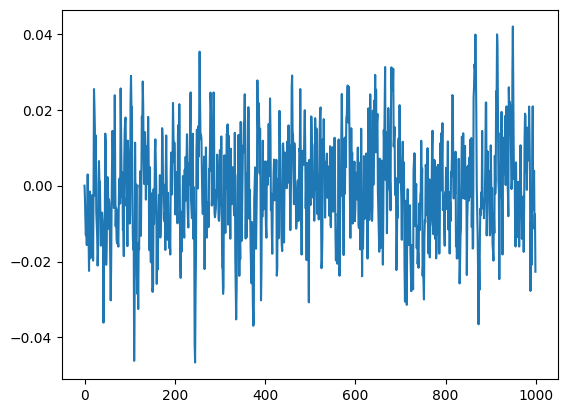

In [ ]:
dt=1.
t=1.*np.arange(155)
#r_t, I, D, R=calc_pandemic(t)
a=calc_pandemic(t)

import numpy as np
np.random.randn(10)
ou=OUParams(0.6,0.0,0.02)
ou_pr=get_OU_process(1000,ou)
ou_pr.shape
plt.plot(get_OU_process(1000,ou))

In [ ]:
num_sim = 1000
method = 'SNRE' #SNPE or SNLE or SNRE
prior = utils.BoxUniform(
    low=torch.tensor([0.05, 0.05]),
    high=torch.tensor([3.0, 3.0])
)

#prior=

#prior=torch.distributions.MultivariateNormal(torch.tensor([0.01,0,0.01]),torch.tensor([0.001,0.2,0.001])*torch.eye(3))

posterior = infer(
    calc_pandemic,
    prior,
    # See glossary for explanation of methods.
    #    SNRE newer than SNLE newer than SNPE.
    method=method,
    num_workers=-1,
    num_simulations=num_sim)

Running 1000 simulations in 1000 batches.: 100%|██████████| 1000/1000 [00:22<00:00, 45.21it/s]


 Neural network successfully converged after 122 epochs.

In [ ]:
observation=calc_pandemic(np.array([1.2,0.9]))
samples = posterior.sample((1000,), x=observation)


Generating samples: 100%|██████████| 10100/10100 [08:16<00:00, 20.33it/s]


/home/bazarova1/.local/lib/python3.10/site-packages/sbi/inference/posteriors/mcmc_posterior.py:172: UserWarning: `.log_prob()` is deprecated for methods that can only evaluate the
            log-probability up to a normalizing constant. Use `.potential()` instead.
  warn(
/home/bazarova1/.local/lib/python3.10/site-packages/sbi/inference/posteriors/mcmc_posterior.py:176: UserWarning: The log-probability is unnormalized!
  warn("The log-probability is unnormalized!")


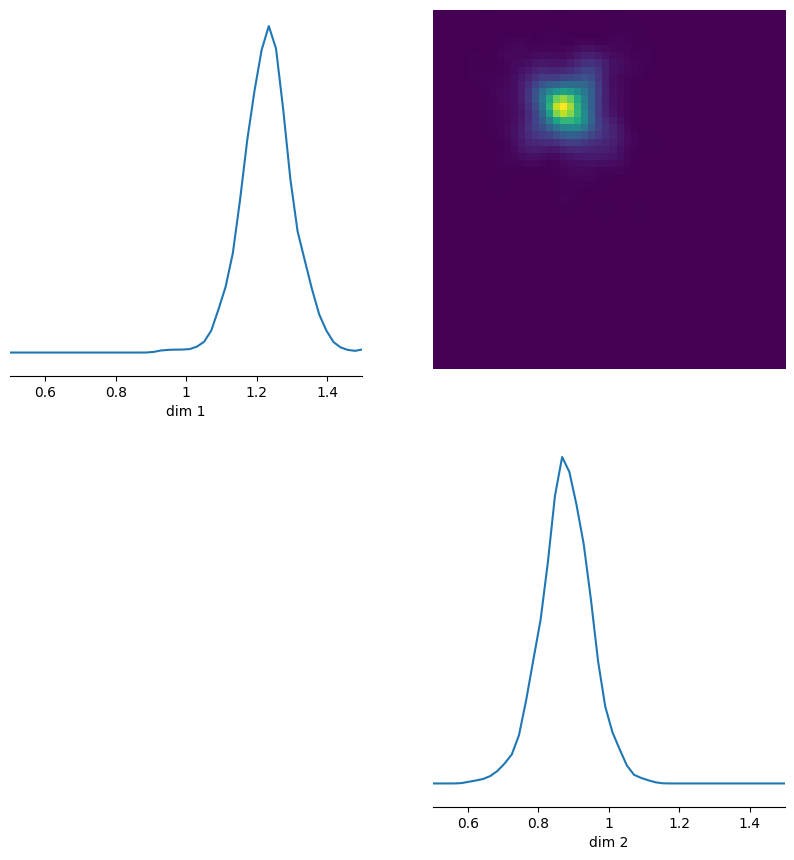

In [ ]:
log_probability = posterior.log_prob(samples, x=observation)
out = pairplot(samples, limits=[[0.5,1.5],[0.5,1.5]], fig_size=(2,2), upper='kde', diag='kde')


In [ ]:
torch.tensor([2,3])*torch.eye(2)

tensor([[2., 0.],
        [0., 3.]])